## Primo esercizion, studio discriminazione eventi di fondo

### Simulazione lampo

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

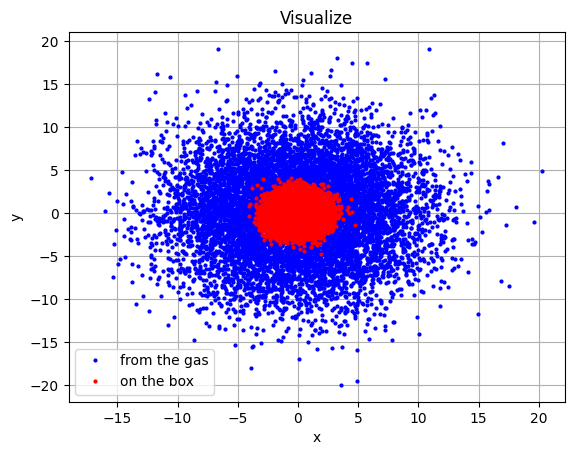

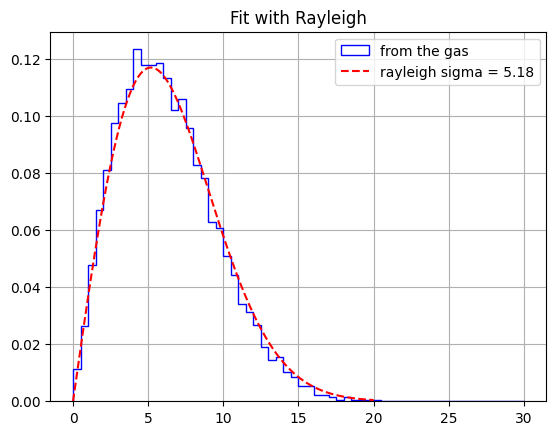

In [146]:
N = 10000 # Number of event
sigmax = 5; sigmay = 5;  sigma2 = 1
x = np.random.normal(0,sigmax,N); y = np.random.normal(0,sigmay,N)

# ON THE WALL
rho = 1 ; theta = np.random.uniform(0,2*np.pi,N)
xwall = rho*np.cos(theta) + np.random.normal(0,sigma2,N); ywall = rho*np.sin(theta) + np.random.normal(0,sigma2,N)
rwall = np.sqrt(xwall**2 + ywall**2)

# CENTER
r = np.sqrt(x**2 + y**2)

# CENTER + WALL
rtot = np.concatenate((r,r1))

def Rayleigh(r, sigma):
    return (r/sigma**2) * np.exp(-(r**2)/(2*sigma**2))

xh = np.linspace(0,20,500)

plt.figure(0)
plt.title("Visualize")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.errorbar(x,y, linestyle = '', marker = '.', markersize = 4, color = 'blue', label = "from the gas")
plt.errorbar(xwall,ywall, linestyle = '', marker = '.', markersize = 4, color = 'red', label = "on the box")
plt.legend()

plt.figure(1)
plt.title("Fit with Rayleigh")
plt.grid()
FitCount,edges , someshit = plt.hist(r, bins = 60,range = (0,30),histtype = "step", color = 'blue', label = "from the gas", density = True)
edges = edges[:-1] + np.diff(edges) 

popt, pcovm = curve_fit(Rayleigh, edges, FitCount)
error = np.sqrt(pcovm.diagonal())[0]
plt.plot(xh, Rayleigh(xh,*popt), linestyle = '--', color = 'red', label = "rayleigh sigma = %.2f" % popt[0])
#plt.hist(r1,bins = 30,histtype = "step", color = 'red', label = "on the box")
#plt.hist(rtot,bins = 30,histtype = "step", color = 'brown', label = "total")
plt.legend()

## Now we study the PDF on the wall

Let's try to find out an analitic formula

In [147]:
N = 1000000 # Number of event
sigmaWall = 1

# ON THE WALL
rho = 1 ; theta = np.random.uniform(0,2*np.pi,N)
dx = np.random.normal(0,sigmaWall,N) ; dy = np.random.normal(0,sigmaWall,N)
xwall = rho*np.cos(theta); ywall = rho*np.sin(theta)
xbar = xwall + dx ; ybar = ywall + dy
rwall = np.sqrt((xwall+dx)**2 + (ywall+dy)**2)

Per studiare come è distribuito rwall, si deve vedere prima come sono distribuiti 
xwall, poi xwall + dx e poi procedere con la cumulante

statistica disponibile:  1000000


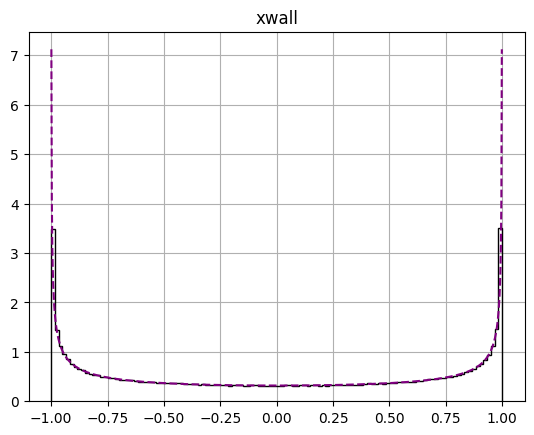

In [148]:
plt.figure(2)
plt.title("xwall")
plt.grid()
print("statistica disponibile: ",len(xwall))
a,b,c = plt.hist(xwall,bins = 120, histtype = 'step', color = 'black',density = True)

# Formula cambio di variabile

def change(x,r):
    const = 1/(np.pi*r)
    return const*1/np.sqrt(1 - (x/r)**2)

xgrid = np.linspace(-rho + 0.001,rho - 0.001,1000)
plt.plot(xgrid,change(xgrid,rho), linestyle = '--', color = 'purple')

Ora noi studiamo xwall + dx, dovrebbe essere la convoluzione di quella di prima con una gaussiana a media 0. il risultato è una pdf dove compare la funzione di bessel modificata

[0.0422909  1.25240318]


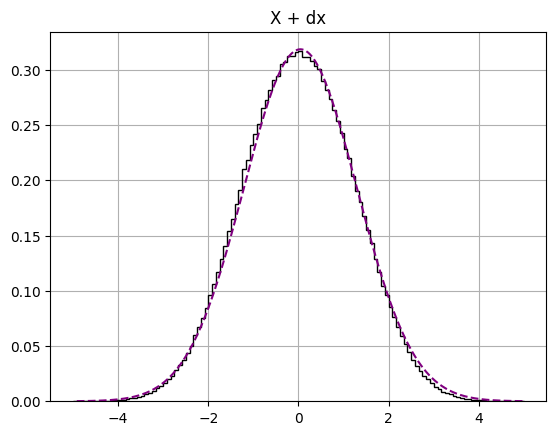

In [149]:
# Modified Bessel function
def gaussiana(x,rho,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x -rho)**2/(2*sigma**2))

plt.figure(3)
plt.grid()
plt.title("X + dx")
a,b,c = plt.hist(xbar,bins = 120, range = (-5,5), histtype = 'step', color = 'black',density = True)
b = b[:-1] + np.diff(b)
xgrid = np.linspace(np.min(b),np.max(b),500)
popt,pcovm = curve_fit(gaussiana, b,a)
plt.plot(xgrid,gaussiana(xgrid,*popt), linestyle = '--', color = 'purple')
print(popt)

# Now analyze real data

In [2]:
arr = np.loadtxt("Spectroscopy/Dataset/r68465_uw_exp_freq4.vertex.csv", delimiter = ",", dtype = str)
#visualize the data
print(arr[:1])
#print(arr[:,9])
#print(arr[:,10])
print(arr[:,5])
print(arr[:,6])
print(arr[:,7])
print(arr[-9])

[['Run Number' 'Event Number' 'Plot Time (Time axis of TAPlot)'
  'Detector Time (detectors internal clock)' 'OfficialTime (run time)'
  'CutsType0' 'CutsType1' 'CutsType2' 'Vertex Status' 'X' 'Y' 'Z'
  'Number of Helices' 'Number of Tracks']]
['CutsType0' '0' '0' ... '1' '1' '1']
['CutsType1' ' 0' ' 0' ... ' 0' ' 1' ' 0']
['CutsType2' ' 0' ' 0' ... ' 0' ' 0' ' 0']
['68465' '1094340' '1.575105' '69653.244708' '69653.442286' '1' ' 0' ' 0'
 ' 1' '5.691488' '-4.921341' '15.014303' '-1' '2']


In [3]:
# TIME (DETECTOR TIME)
Tvertex = arr[:,3] ;
print("number of points: ", len(Tvertex))
Tvertex = np.delete(Tvertex,0)
print("number of points: ", len(Tvertex))
Tvertex = np.asarray(Tvertex, dtype = float)

# X VERTEX
Xvertex = arr[:,9] ;
print("number of points: ", len(Xvertex))
Xvertex = np.delete(Xvertex,0)
print("number of points: ", len(Xvertex))
Xvertex = np.asarray(Xvertex, dtype = float)

# Y VERTEX
Yvertex = arr[:,10] ;
print("number of points: ", len(Yvertex))
Yvertex = np.delete(Yvertex,0)
print("number of points: ", len(Yvertex))
Yvertex = np.asarray(Yvertex, dtype = float)

# Z VERTEX
Zvertex = arr[:,11]
print("number of points: ", len(Zvertex))
Zvertex = np.delete(Zvertex,0)
print("number of points: ", len(Zvertex))
Zvertex = np.asarray(Zvertex, dtype = float)


#Cuts 
cut0 = arr[:,5] ; cut0 = np.delete(cut0,0) ; cut0 = np.asarray(cut0, dtype = bool)
cut1 = arr[:,6] ; cut1 = np.delete(cut1,0) ; cut1 = np.asarray(cut1, dtype = bool)
cut2 = arr[:,7] ; cut2 = np.delete(cut2,0) ; cut2 = np.asarray(cut2, dtype = bool)
print(cut0[:10])

number of points:  5221
number of points:  5220
number of points:  5221
number of points:  5220
number of points:  5221
number of points:  5220
number of points:  5221
number of points:  5220
[False False False False  True False  True  True  True False]


## Now the data are ready for the analysis
# radius without cuts


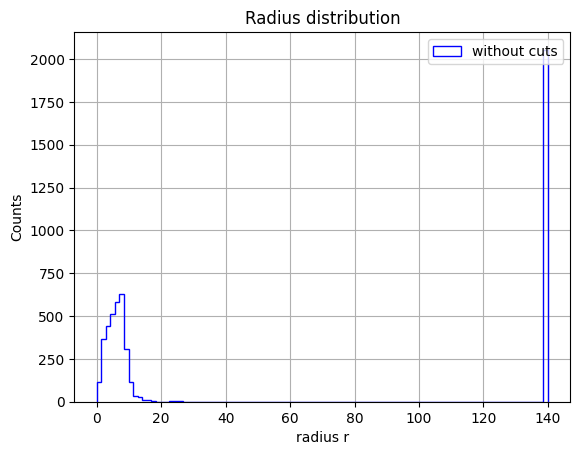

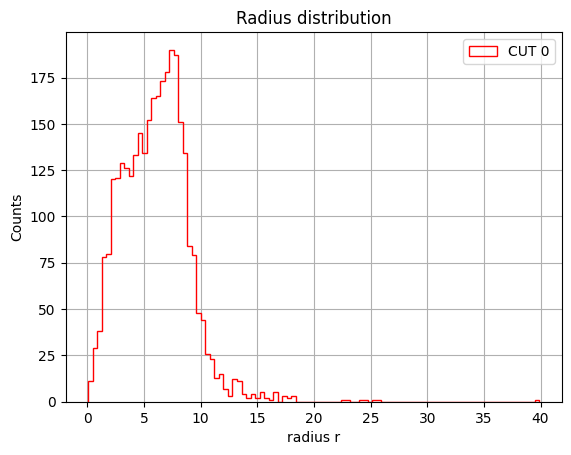

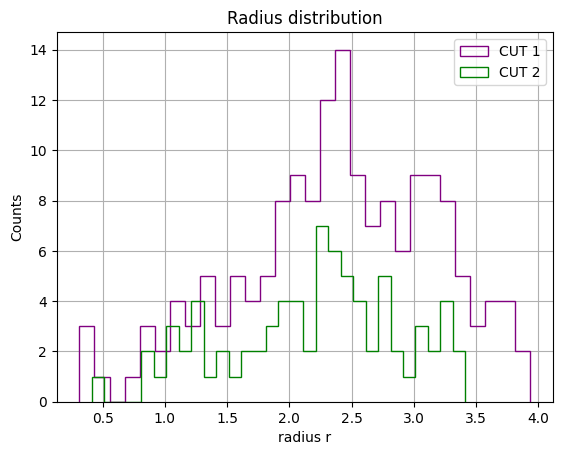

In [4]:
#radius without cuts 
r = np.sqrt(Xvertex**2 + Yvertex**2)
Rcut0 = r[cut0] ; Rcut1 = r[cut1]; Rcut2 = r[cut2]

plt.figure(1)
plt.grid()
plt.title("Radius distribution")
plt.xlabel("radius r") ; plt.ylabel("Counts")
plt.hist(r,bins = 100, histtype = 'step', color = 'blue', label = "without cuts")
plt.legend()
plt.figure(2)
plt.grid()
plt.title("Radius distribution")
plt.xlabel("radius r") ; plt.ylabel("Counts")
plt.hist(Rcut0,bins = 100, histtype = 'step', color = 'red', label = "CUT 0")
plt.legend()
plt.figure(3)
plt.grid()
plt.title("Radius distribution")
plt.xlabel("radius r") ; plt.ylabel("Counts")
plt.hist(Rcut1,bins = 30, histtype = 'step', color = 'purple', label = "CUT 1")
plt.hist(Rcut2,bins = 30, histtype = 'step', color = 'green', label = "CUT 2")
plt.legend()

# Distribution in Z

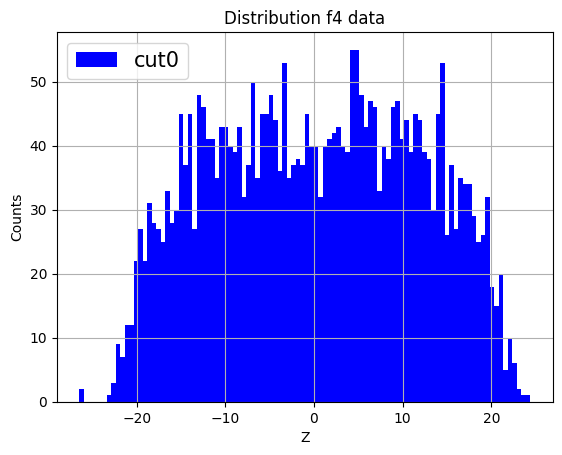

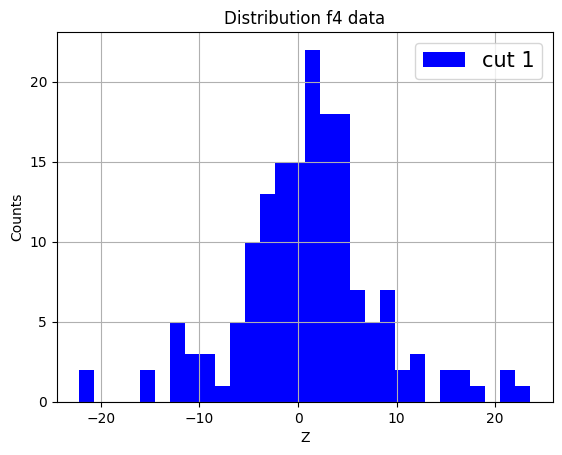

In [5]:
plt.figure(4)
plt.grid()
plt.title("Distribution f4 data")
plt.xlabel("Z") ; plt.ylabel("Counts")
plt.hist(Zvertex[cut0],bins = 100, color = 'blue', label = "cut0")
plt.legend(fontsize = 15)
plt.figure(5)
plt.grid()
plt.title("Distribution f4 data")
plt.xlabel("Z") ; plt.ylabel("Counts")
plt.hist(Zvertex[cut1],bins = 30, color = 'blue', label = "cut 1")
plt.legend(fontsize = 15)

## TIME distribution

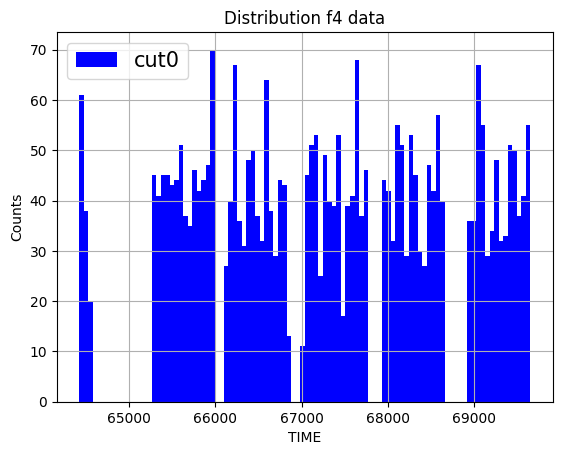

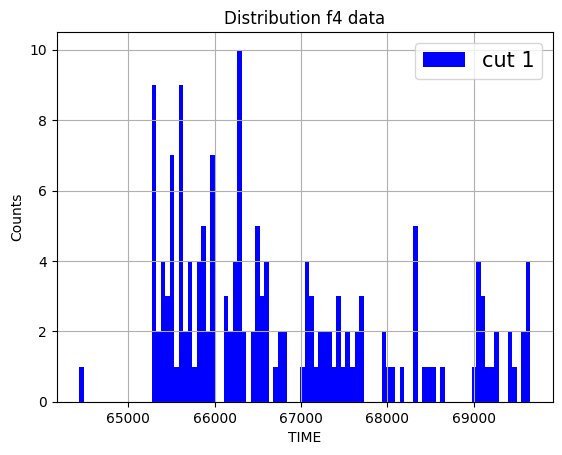

In [6]:
plt.figure(4)
plt.grid()
plt.title("Distribution f4 data")
plt.xlabel("TIME") ; plt.ylabel("Counts")
plt.hist(Tvertex[cut0],bins = 100, color = 'blue', label = "cut0")
plt.legend(fontsize = 15)
plt.figure(5)
plt.grid()
plt.title("Distribution f4 data")
plt.xlabel("TIME") ; plt.ylabel("Counts")
plt.hist(Tvertex[cut1],bins = 100, color = 'blue', label = "cut 1")
plt.legend(fontsize = 15)

## Seleziono il taglio CUT1

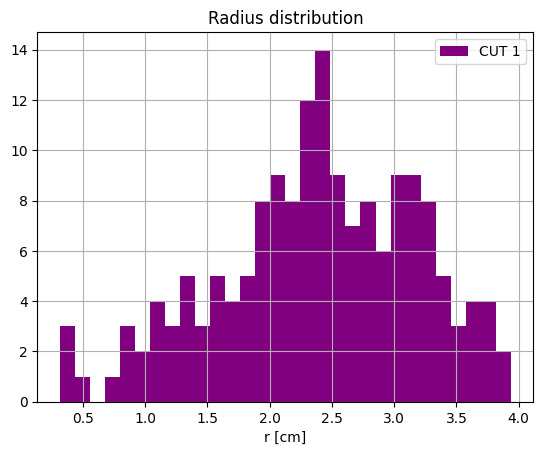

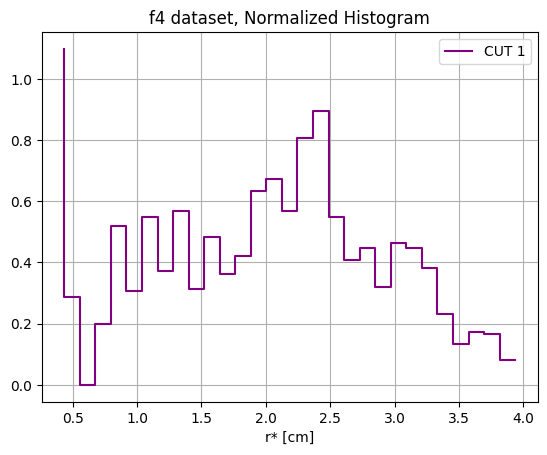

In [8]:
# PLOT TAGLIO CUT1 MIXING
plt.figure(4)
plt.title("Radius distribution")
plt.xlabel("r [cm]")
plt.grid()
f4count, f4edges, bars = plt.hist(Rcut1,bins = 30, color = 'purple', label = "CUT 1")
plt.legend()

f4edges = f4edges[:-1] + np.diff(f4edges)

#PLOT CON AREA NORMALIZZATA
plt.figure(5)
plt.title("f4 dataset, Normalized Histogram")
plt.xlabel("r* [cm]")
plt.grid()
normalized = f4count/(f4edges*2*np.pi)
plt.step(f4edges, normalized, color = 'purple', label = "CUT 1")
plt.legend()
plt.savefig("./PlotMLEfit/Normalizedf4.pdf",format = 'pdf')




# ORA FACCIAMO IL FIT CON I TEMPLATE DELLE 3 DISTRIBUZIONI

### Carico il template MIXING, per la distribuzione lungo la parete

In [9]:
Mixedges, Mixcount = np.loadtxt("mixing.txt", unpack = True)
BKedges, BKcount = np.loadtxt("background.txt", unpack = True)

<ErrorbarContainer object of 3 artists>

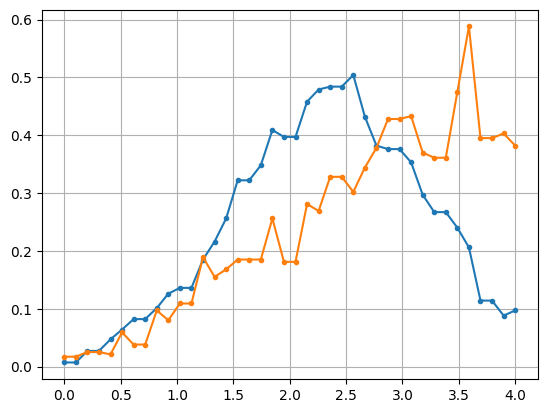

In [10]:
# Find nearest trova il bin più vicino alla funzione x
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Mixing è il template per la funzione 
def Mixing(x):
    index = find_nearest(Mixedges,x)
    return Mixcount[index]

def Background(x):
    index = find_nearest(BKedges,x)
    return BKcount[index]

Mixing = np.vectorize(Mixing)
Background = np.vectorize(Background)
plt.grid()
hh = np.linspace(0,4,40)
plt.errorbar(hh, Mixing(hh), marker = '.')
plt.errorbar(hh, Background(hh), marker = '.')

In [11]:
def Rayleigh(r, sigma):
    return (r/sigma**2) * np.exp(-(r**2)/(2*sigma**2))

Rayleigh = np.vectorize(Rayleigh)

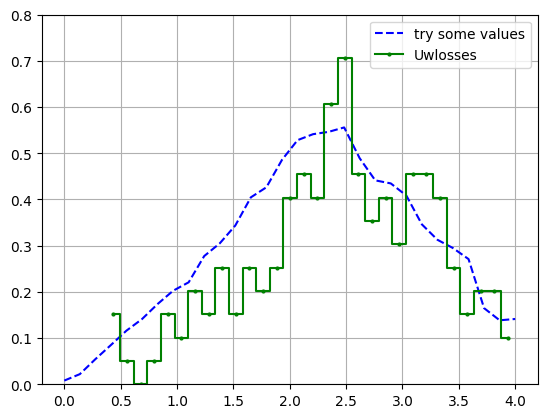

In [12]:
#DEFINISCO IL MODELLO COMPLETO PER IL FIT, FATTO DALLA RAYLEIGH E DUE TEMPLATES

def Template(x,Nmix,Nbk,Nray,sigma):
    return Nmix*Mixing(x) + Nbk*Background(x) + Nray*Rayleigh(x,sigma)

plt.grid()
plt.ylim(0,0.8)
xx = np.linspace(0,4,30)
plt.plot(xx, Template(xx,0.9,0.10,0.25,1.57), linestyle = '--', color = 'blue', label = 'try some values')
plt.step(f4edges, f4count, linestyle = '-', where='mid',color = 'green', marker = '.', markersize = 4, label = "Uwlosses")
plt.legend()

# PYROOT FOR THE FIT

In [1]:
import ROOT
from ROOT import *
from ROOT import TMath
from array import array
%jsroot on

Welcome to JupyROOT 6.26/10


In [2]:
#defining the fit function

def myRayleigh(x, p):
    sigma = par[0]
    r = x[0]
    tmp = r**2/sigma * np.exp(-(x)**2/(2*sigma))
    return tmp

# "(x/([0]*[0])*exp(-x*x/(2*[0]*[0]))"
f1 = ROOT.TF1("funzione","x/([0]*[0])*exp(-(x*x)/(2*[0]*[0]))" ,0,4)
f1.SetTitle("Rayleigh Distribution")
f1.SetParName(0,"sigma")

par = array('d', [1])
print(par)
f1.SetParameters(par)

c = ROOT.TCanvas("c", "Rayleigh distribution", 500, 500)
c.Draw() # Necessary to make the graphics show!
c.SetGridx()
c.SetGridy()
f1.Draw()

array('d', [1.0])


## Template per il Mixing (pareti)

In [3]:
cpp_definition = ''' 
//definition of the function and arrays
double StepFunction(double x, double bins[], double Counts[], int arraysize);

double bins[30] = {0.133, 0.267, 0.4, 0.533, 0.667, 0.8, 0.933, 
    1.067, 1.2, 1.333, 1.467, 1.6, 1.733, 1.867, 2.0, 2.133, 2.267, 
    2.4, 2.533, 2.667, 2.8, 2.933, 3.067, 3.2, 3.333, 3.467, 3.6, 
    3.733, 3.867, 4.0};
    
double MixingCount[30] = {0.007, 0.027, 0.047, 0.064, 0.082, 0.101, 0.126,
                        0.136, 0.185, 0.216, 0.256, 0.322, 0.348,
                        0.409, 0.397, 0.458, 0.479, 0.484, 0.504, 0.432, 0.382,
                        0.376, 0.353, 0.297, 0.267, 0.24, 0.206, 0.114, 0.088, 0.097};
                    
double Cosmic[30] = {0.017, 0.025, 0.021, 0.059, 0.038, 0.097, 
                    0.08, 0.109, 0.189, 0.155, 0.168, 0.185, 0.185, 0.256, 0.181, 
                    0.281, 0.269, 0.328, 0.302, 0.344, 0.378, 0.428, 0.433, 0.37, 
                    0.361, 0.475, 0.588, 0.395, 0.403, 0.382};

'''

cpp_code = ''' 
// Template Mixing definition

double StepFunction(double x ,double bins[], double Counts[], int arraysize){
    int index = 0;
    for(int i = 0; i < arraysize; i++){
        if(x >= bins[i]){
            index = i;
        }
    }
    
    return Counts[index];
}
'''
ROOT.gInterpreter.Declare(cpp_definition)
ROOT.gInterpreter.ProcessLine(cpp_code)


0

In [4]:
# Now convert the array in MixingEdges to the array that is accepted by Root
#Something like that: binning = array('d', [1,2,3])

binning = array('d', Mixedges)
MixingCount = array('d', Mixcount)
BKground = array('d', BKcount)

print("Binning array :\n",binning,    '\n')
print("Mixing array :\n" ,MixingCount,'\n')
print("Cosmic array :\n" ,BKground,   '\n')


print("Funzione Template Mixing valutata a x = %.2f" % 2, " : ", ROOT.StepFunction(2,binning, MixingCount, len(binning)))

NameError: name 'Mixedges' is not defined

In [17]:

WallAnnihilation = ROOT.TF1("WallAnnihilation", "[0]*StepFunction(x, bins, MixingCount,30)",0,4)
BackGround = ROOT.TF1("Back", "[0]*StepFunction(x,bins,Cosmic,30)",0,4)

parametro = array('d', [1])
BackGround.SetParameters(parametro)
WallAnnihilation.SetParameters(parametro)
b = ROOT.TCanvas()
b.Draw()
f1.Draw()
BackGround.Draw("same")
WallAnnihilation.Draw("same")
print(ROOT.WallAnnihilation(0))
#print(ROOT.BackGround(0))


0.007


In [6]:
#h1 = ROOT.TH1F("distribution", "Spectroscopy Distribution; radius; Events",30,0,4)
#for event in Rcut1:
#    h1.Fill(event)
#d = ROOT.TCanvas()
#d.Draw()
#h1.Draw()

NameError: name 'Rcut1' is not defined